### Project: 'Modelo Predictivo de Churn Basado en Patrones de Contactabilidad para Optimizar la Retención de Leads en la Etapa de Experiencia del Cliente'  
#### Author: Flavia Davila Perez
##### Stage: EDA
Description: Data exploration

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### Import Data 

In [2]:
# import CSV to DataFrame
df = pd.read_csv(r'..\data\output_silver\contact_metrics_clean.csv')

In [3]:
df['(C) (EXP) Plazo y Pago'].value_counts()

(C) (EXP) Plazo y Pago
Anual      285
Mensual     87
Otros        1
Name: count, dtype: int64

In [4]:
df.columns

Index(['org_id.value', 'Tipo de cliente', 'Total_Actividades_com',
       'Total_Llamadas_com', 'Llamadas_Efectivas_com',
       'Llamadas_No_Efectivas_com', 'WA_Seguimiento_com', 'Reuniones_Hechas',
       'Reuniones_Canceladas', 'Tipo Primer Contacto', 'Rango de Contacto',
       'New Categories', 'R1yR2', 'Total_Actividades_exp',
       'Total_Llamadas_exp', 'Llamadas_Efectivas_exp',
       'Llamadas_No_Efectivas_exp', 'WA_Seguimiento_exp', 'Kickoff_Hechas',
       'Kickoff_Canceladas', 'Capacitaciones_Hechas',
       'Capacitaciones_Canceladas', 'Tipo Primera Capacitación', 'Onboarding',
       '(C) (EXP) Plazo y Pago', 'Churn Comercial'],
      dtype='object')

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
org_id.value,373.0,180256.84,78622.68,515.0,181294.0,220338.0,230275.0,245287.0
Total_Actividades_com,373.0,12.93,10.20,1.0,6.0,10.0,17.0,42.0
Total_Llamadas_com,373.0,6.40,5.77,0.0,2.0,4.0,9.0,21.0
Llamadas_Efectivas_com,373.0,4.23,3.57,0.0,2.0,3.0,6.0,13.0
Llamadas_No_Efectivas_com,373.0,2.12,2.85,0.0,0.0,1.0,3.0,10.0
WA_Seguimiento_com,373.0,4.96,4.08,0.0,2.0,4.0,7.0,15.0
Reuniones_Hechas,373.0,1.13,0.72,0.0,1.0,1.0,2.0,3.0
Reuniones_Canceladas,373.0,0.16,0.51,0.0,0.0,0.0,0.0,3.0
New Categories,373.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0
R1yR2,373.0,0.17,0.38,0.0,0.0,0.0,0.0,1.0


In [6]:
num_columns_com = [
    'Total_Actividades_com', 
    'Total_Llamadas_com', 
    'Llamadas_Efectivas_com',
    'Llamadas_No_Efectivas_com', 
    'WA_Seguimiento_com', 
    'Reuniones_Hechas', 
    'Reuniones_Canceladas',
]

num_columns_exp = [
    'Total_Actividades_exp', 
    'Total_Llamadas_exp',
    'Llamadas_Efectivas_exp',
    'Llamadas_No_Efectivas_exp', 
    'WA_Seguimiento_exp', 
    'Capacitaciones_Hechas', 
    'Capacitaciones_Canceladas'
]


cat_columns = [
    'Tipo de cliente',
    'Tipo Primer Contacto',
    'Rango de Contacto',
    'Tipo Primera Capacitación',
    'Onboarding',
    '(C) (EXP) Plazo y Pago',
    'R1yR2'
    ]

label = ['Churn Comercial']

### Analisis Univariado

In [7]:
df.describe(include='object').T

,count,unique,top,freq
Tipo de cliente,373,3,B,235
Tipo Primer Contacto,373,4,Efectiva,222
Rango de Contacto,373,3,Fuera del rango,224
Tipo Primera Capacitación,373,2,Hecha,202
Onboarding,373,2,No Finalizado,276
(C) (EXP) Plazo y Pago,373,3,Anual,285


In [8]:
# Agrupamos datos categóricos 'Tipo de cliente'
variable = 'Tipo de cliente'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Tipo de Cliente</b><br>',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False
)

fig.show()


In [9]:
df_cat

,Tipo de cliente,Conteo
0,A,84
1,B,235
2,C,54


In [10]:
# Agrupamos datos categóricos '(C) (EXP) Plazo y Pago'
variable = '(C) (EXP) Plazo y Pago'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Plan de Pago</b><br>',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False
)

fig.show()


In [11]:
df_cat

,(C) (EXP) Plazo y Pago,Conteo
0,Anual,285
1,Mensual,87
2,Otros,1


In [12]:
# Agrupamos datos categóricos 'Tipo Primer Contacto'
variable = 'Tipo Primer Contacto'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Tipo de Primer Contacto</b><br>Embudo Comercial',
    width=500,
    height=500,
    xaxis_title='Tipo de Llamadas', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=-45
)

fig.show()

In [13]:
df_cat

,Tipo Primer Contacto,Conteo
0,Efectiva,222
1,No Efectiva,84
2,No tuvo,65
3,Sin Avance,2


In [14]:
# Agrupamos datos categóricos 'Rango de Contacto'
variable = 'Rango de Contacto'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Rango de Primer Contacto</b><br>Embudo Comercial',
    width=650,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=45
)

fig.show()

In [15]:
df_cat

,Rango de Contacto,Conteo
0,Dentro del rango,84
1,Fuera del rango,224
2,Sin Llamada de primer contacto,65


In [16]:
# Agrupamos datos categóricos 'R1yR2'
variable = 'R1yR2'
df[variable] = df[variable].astype(str)

df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Conteo de Clientes que tuvieron R1 y R2</b><br>Embudo Comercial',
    width=650,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=45
)

fig.show()

In [17]:
df_cat

,R1yR2,Conteo
0,0,310
1,1,63


In [18]:
# Agrupamos datos categóricos 'Tipo Primera Capacitación'
variable = 'Tipo Primera Capacitación'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Tipo de Primera Capacitación ERP</b><br>Embudo Experiencia',
    width=500,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=-45
)

fig.show()

In [19]:
df_cat

,Tipo Primera Capacitación,Conteo
0,Hecha,202
1,No tuvo,171


In [20]:
# Agrupamos datos categóricos 'Onboarding'
variable = 'Onboarding'
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Estado de Onboarding</b><br>Embudo Experiencia',
    width=500,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=-45
)

fig.show()

In [21]:
df_cat

,Onboarding,Conteo
0,Finalizado,97
1,No Finalizado,276


In [22]:
# Agrupamos datos categóricos 'Churn Comercial'
variable = 'Churn Comercial'
df[variable] = df[variable].astype(str)
df_cat = df.groupby(variable)['org_id.value'].agg(Conteo='count').reset_index()

# Crear gráfico de barras con Plotly
fig = px.bar(
    df_cat,
    x=variable,
    y='Conteo', 
    color=variable,
    template='plotly_white'
)

fig.update_layout(
    title='<b>Estado de Churn</b><br>',
    width=500,
    height=500,
    xaxis_title='', 
    yaxis_title='Conteo', 
    title_x = 0.5,
    showlegend=False,
    #xaxis_tickangle=-45
)

fig.show()

In [23]:
df_cat

,Churn Comercial,Conteo
0,0,338
1,1,35


In [24]:
df[num_columns_com].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Actividades_com,373.0,12.930295,10.200699,1.0,6.0,10.0,17.0,42.0
Total_Llamadas_com,373.0,6.402145,5.770633,0.0,2.0,4.0,9.0,21.0
Llamadas_Efectivas_com,373.0,4.225201,3.573756,0.0,2.0,3.0,6.0,13.0
Llamadas_No_Efectivas_com,373.0,2.120643,2.854713,0.0,0.0,1.0,3.0,10.0
WA_Seguimiento_com,373.0,4.959786,4.078661,0.0,2.0,4.0,7.0,15.0
Reuniones_Hechas,373.0,1.131367,0.715728,0.0,1.0,1.0,2.0,3.0
Reuniones_Canceladas,373.0,0.158177,0.507120,0.0,0.0,0.0,0.0,3.0


In [25]:
variable='Total_Actividades_com'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Actividades Totales Embudo Comercial',
    template="plotly_white",
    nbins=45
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Actividades Totales</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Actividades', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=800, height=500)
fig.show()

In [26]:
variable='Total_Llamadas_com'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas Totales Embudo Comercial',
    template="plotly_white",
    nbins=24
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas Totales</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [27]:
variable='Llamadas_Efectivas_com'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas Efectivas Embudo Comercial',
    template="plotly_white",
    nbins=20
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas Efectivas</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [28]:
variable='Llamadas_No_Efectivas_com'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas No Efectivas Embudo Comercial',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas No Efectivas</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [29]:
variable='WA_Seguimiento_com'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Seguimientos por WA Embudo Comercial',
    template="plotly_white",
    #bins=10
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Seguimientos por WA</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Mensajes', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [30]:
variable='Reuniones_Hechas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Reuniones Hechas Embudo Comercial',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Reuniones Hechas</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Reuniones', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [31]:
variable='Reuniones_Canceladas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Reuniones Canceladas Embudo Comercial',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Reuniones Canceladas</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='Número de Reuniones', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [32]:
df[num_columns_exp].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Total_Actividades_exp,373.0,5.62,4.59,1.0,2.0,4.0,8.0,17.0
Total_Llamadas_exp,373.0,1.66,2.11,0.0,0.0,1.0,3.0,7.0
Llamadas_Efectivas_exp,373.0,0.74,0.97,0.0,0.0,0.0,1.0,3.0
Llamadas_No_Efectivas_exp,373.0,0.88,1.48,0.0,0.0,0.0,1.0,5.0
WA_Seguimiento_exp,373.0,2.09,2.74,0.0,0.0,1.0,3.0,9.0
Capacitaciones_Hechas,373.0,0.78,1.01,0.0,0.0,0.0,1.0,3.0
Capacitaciones_Canceladas,373.0,0.26,0.54,0.0,0.0,0.0,0.0,2.0


In [33]:
variable='Total_Actividades_exp'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Actividades Totales Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Actividades Totales</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Actividades', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [34]:
variable='Total_Llamadas_exp'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas Totales Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas Totales</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [35]:
variable='Llamadas_Efectivas_exp'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas Efectivas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas Efectivas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [36]:
variable='Llamadas_No_Efectivas_exp'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Llamadas No Efectivas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Llamadas No Efectivas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Llamadas', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [37]:
variable='WA_Seguimiento_exp'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Seguimientos por WA Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Seguimientos por WA</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Mensajes', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [38]:
variable='Kickoff_Hechas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Kick Off Hechas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Kick Off Hechas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Kick Offs', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [39]:
variable='Kickoff_Canceladas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Kick Off Canceladas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Kick Off Canceladas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Kick Offs', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [40]:
variable='Capacitaciones_Hechas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Capacitaciones Hechas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Capacitaciones Hechas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Capacitaciones', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

In [41]:
variable='Capacitaciones_Canceladas'

fig = px.histogram(
    df,
    x=variable, 
    title='Distribución de Capacitaciones Canceladas Embudo Experiencia',
    template="plotly_white"
)

fig.update_xaxes(
    title='Número de Actividades', 
    #tickangle=45, 
)

fig.update_yaxes(
    title='Frecuencia', 
)

fig.update_layout(
    title='<b>Distribución de Capacitaciones Canceladas</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='Número de Capacitaciones', 
    yaxis_title='Frecuencia', 
    title_x = 0.5,
)

fig.update_layout(width=600, height=500)
fig.show()

### Analisis Bivariado

In [42]:
variable='Total_Actividades_com'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Total Actividades vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Actividades', 
    title_x = 0.5,
)

fig.update_layout(width=500, height=500)
fig.show()

In [43]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,13.10
1,11.31


In [74]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear la figura con subgráficos
fig = make_subplots(rows=1, cols=1, shared_yaxes=True)

# Añadir el boxplot para 'Total_Actividades_com'
fig.add_trace(go.Box(
    y=df['Total_Actividades_com'],
    x=df['Churn Comercial'],
    name='Total_Actividades_com',
    boxmean='sd',
    marker=dict(color='blue'),
    #showlegend=False
))

# Añadir el boxplot para 'Total_Actividades_exp'
fig.add_trace(go.Box(
    y=df['Total_Actividades_exp'],
    x=df['Churn Comercial'],
    name='Total_Actividades_exp',
    boxmean='sd',
    marker=dict(color='green'),
    #showlegend=False
))

# Actualizar diseño
fig.update_layout(
    title='<b>Total Actividades por Embudo vs Churn Comercial</b><br>',
    width=600,
    height=500,
    xaxis_title='Churn Comercial',
    yaxis_title='Actividades',
    title_x=0.5,
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()


In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear la figura con subgráficos
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

# Añadir el boxplot para 'Total_Actividades_com' en el primer subgráfico
fig.add_trace(go.Box(
    y=df['Total_Actividades_com'],
    x=df['Churn Comercial'],
    name='Total_Actividades_com',
    boxmean='sd',
    marker=dict(color='blue'),
    #showlegend=False
), row=1, col=1)

# Añadir el boxplot para 'Total_Actividades_exp' en el segundo subgráfico
fig.add_trace(go.Box(
    y=df['Total_Actividades_exp'],
    x=df['Churn Comercial'],
    name='Total_Actividades_exp',
    boxmean='sd',
    marker=dict(color='green'),
    #showlegend=False
), row=1, col=2)

# Actualizar diseño
fig.update_layout(
    title='<b>Total Actividades por Embudo vs Churn Comercial</b><br>',
    width=800,  # Ajustar el tamaño
    height=500,
    xaxis_title='Churn Comercial',
    yaxis_title='Actividades',
    title_x=0.5,
    template='plotly_white'
)

# Mostrar el gráfico
fig.show()


In [44]:
variable='Total_Llamadas_com'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Total Llamadas vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=500, height=500)
fig.show()

In [45]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,6.50
1,5.49


In [46]:
variable='Llamadas_Efectivas_com'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Llamadas Efectivas vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=500, height=500)
fig.show()

In [47]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,4.30
1,3.49


In [48]:
variable='Llamadas_No_Efectivas_com'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Llamadas No Efectivas vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [49]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,2.14
1,1.91


In [50]:
variable='WA_Seguimiento_com'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Seguimiento WA vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Mensajes', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [51]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,5.04
1,4.23


In [52]:
variable='Reuniones_Hechas'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Reuniones Hechas vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [53]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,1.12
1,1.23


In [54]:
variable='Reuniones_Canceladas'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Reuniones Canceladas vs Churn Comercial</b><br> Embudo Comercial',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [55]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,0.15
1,0.20


## Experiencia

In [56]:
variable='Total_Actividades_exp'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Total Actividades vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Actividades', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [57]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,5.55
1,6.29


In [58]:
variable='Llamadas_Efectivas_exp'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Llamadas Efectivas vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [59]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,0.71
1,1.09


In [60]:
variable='Llamadas_No_Efectivas_exp'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Llamadas No Efectivas vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Llamadas', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [61]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,0.78
1,1.91


In [62]:
variable='WA_Seguimiento_exp'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Seguimiento WA vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Mensajes', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [63]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,2.11
1,1.94


In [64]:
variable='Capacitaciones_Hechas'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Capacitaciones ERP Hechas vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Capacitaciones', 
    title_x = 0.5,
)

fig.update_layout(width=550, height=500)
fig.show()

In [65]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,0.83
1,0.31


In [66]:
variable='Capacitaciones_Canceladas'
fig = px.box( 
    df,
    x='Churn Comercial',
    y=variable, 
    points="all", 
    template="plotly_white",
    color='Churn Comercial'
)
fig.update_layout(
    title='<b>Relación Capacitaciones ERP Canceladas vs Churn Comercial</b><br> Embudo Experiencia',
    width=400,
    height=500,
    xaxis_title='', 
    yaxis_title='Capacitaciones', 
    title_x = 0.5,
)

fig.update_layout(width=650, height=500)
fig.show()

In [67]:
df.groupby('Churn Comercial')[variable].agg(
    promedio = 'mean'
).round(2)

,promedio
Churn Comercial,
0,0.24
1,0.43


In [68]:
subset_cols= num_columns_com + num_columns_exp + label
df_subset = df[subset_cols]

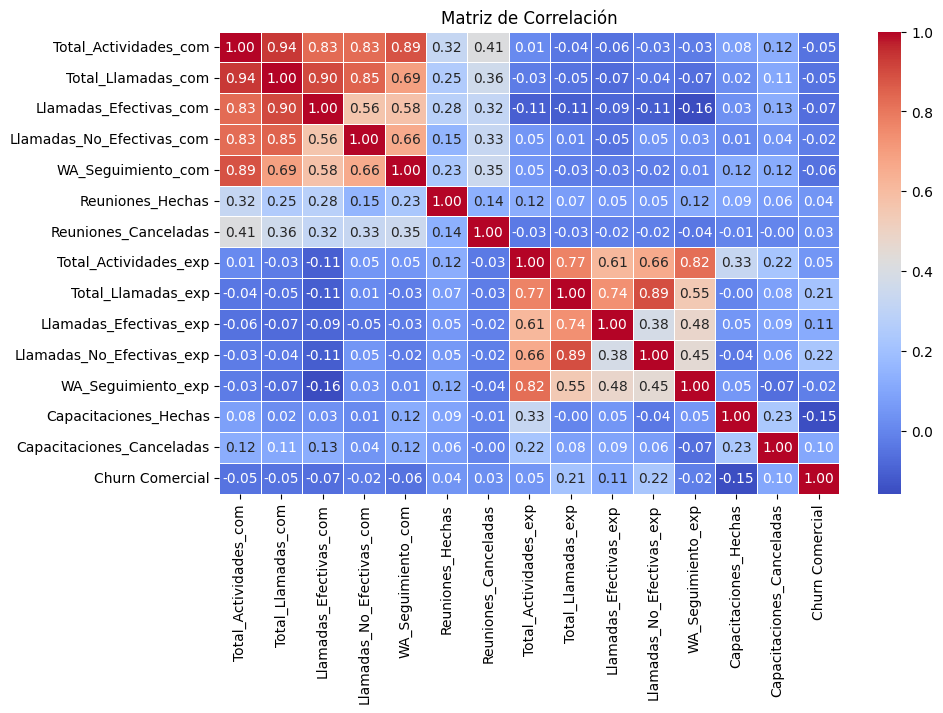

In [69]:
corr_matrix = df_subset.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()